In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
# we want to look at the plotted figures in the notebook
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
column = df.columns
column

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
len(df['id'].unique()) == len(df.index)
# which means that all id values are unique (as expected)
# we may ignore that column

True

In [6]:
df['diagnosis'].unique()
# M = malignant, B = benign

array(['M', 'B'], dtype=object)

In [7]:
df.info()
# diagnosis is categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

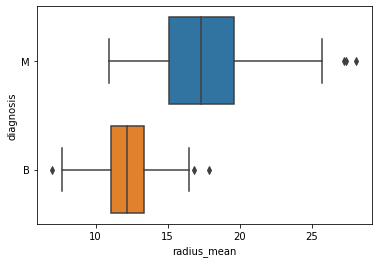

In [8]:
y = df['diagnosis']
x = df['radius_mean']
sns.boxplot(x, y)

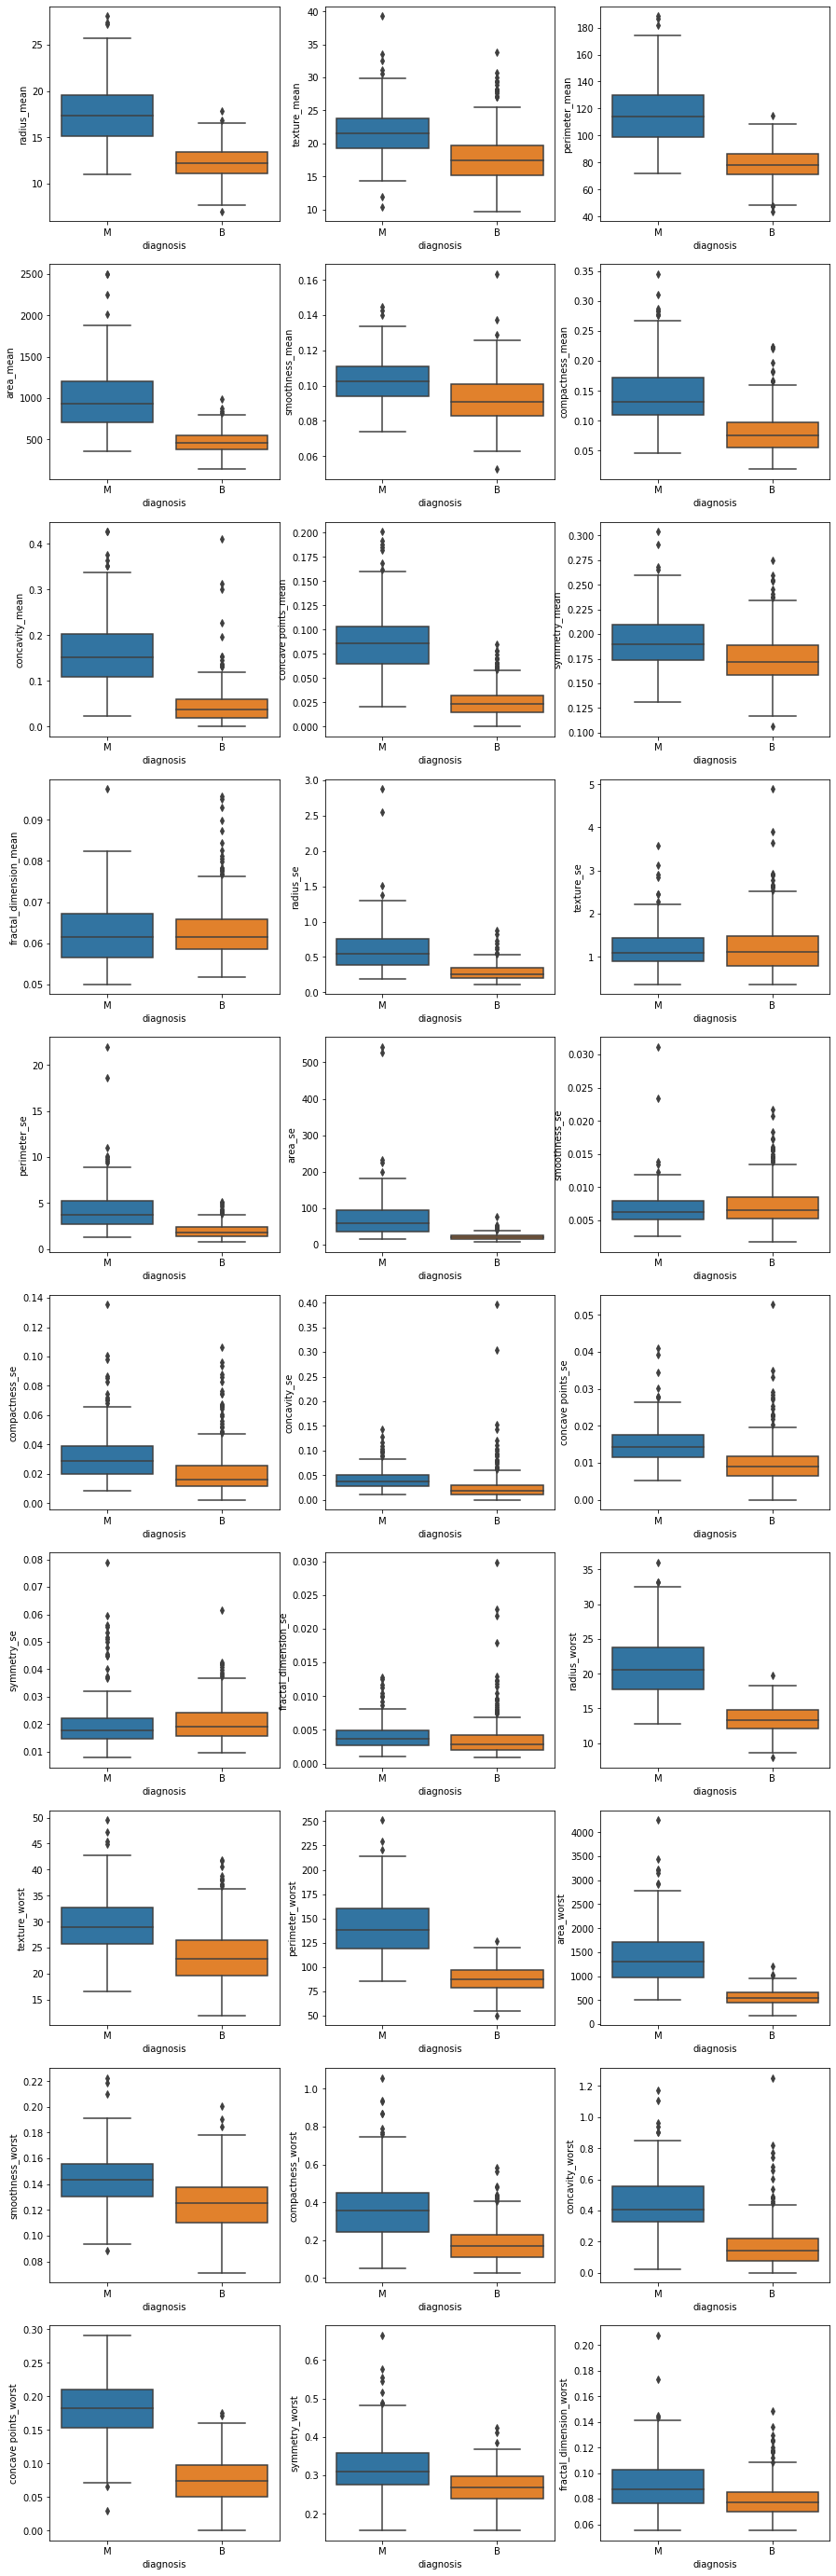

In [9]:
fig, axes = plt.subplots(10, 3, figsize=(15,50))

c = np.reshape(column[2:], (10, 3))

for i in range(10):
    for j in range(3):
        sns.boxplot(df[column[1]], df[c[i][j]], ax = axes[i, j])
        
fig.savefig('boxplot.png', bbox_inches = 'tight')

In [10]:
column

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
cat_df = df.select_dtypes(include=['object']).copy()
cat_df.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


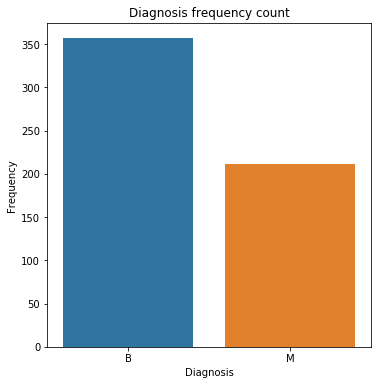

In [12]:
cat = cat_df['diagnosis'].value_counts()
fig = plt.figure(figsize = (9, 9))
ax = fig.add_axes([0, 0, 0.5, 0.5])
x = cat.index
y = cat.values
sns.barplot(x, y, ax = ax)
ax.set_title("Diagnosis frequency count")
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Frequency')
fig.savefig('diagnosis_barplot.png', bbox_inches = 'tight')
# print(cat_df['diagnosis'].value_counts().count())

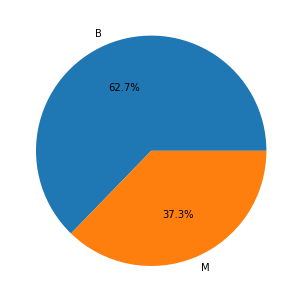

In [13]:
labels = cat.index.tolist()
sizes = cat.values.tolist()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
fig.savefig('diagnosis_piechart.png')

In [14]:
groups = []

for i in range (2, 12):
    l = []
    for j in range(3):
        l.append(column[i + j*10])
    l.append(column[1])
    groups.append(l)

<Figure size 432x288 with 0 Axes>

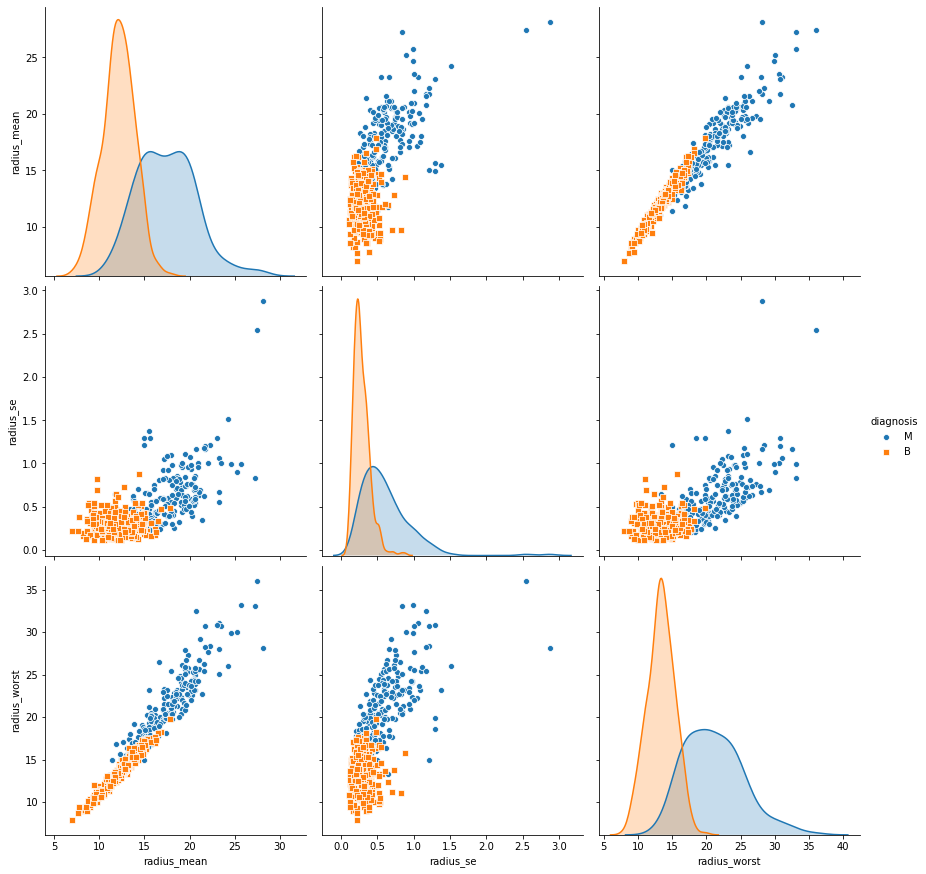

In [15]:
radius = df[groups[0]]
fig = plt.figure()
fig = sns.pairplot(radius, hue='diagnosis', markers=["o", "s"],height=4)
fig.savefig('radius_pairplot.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

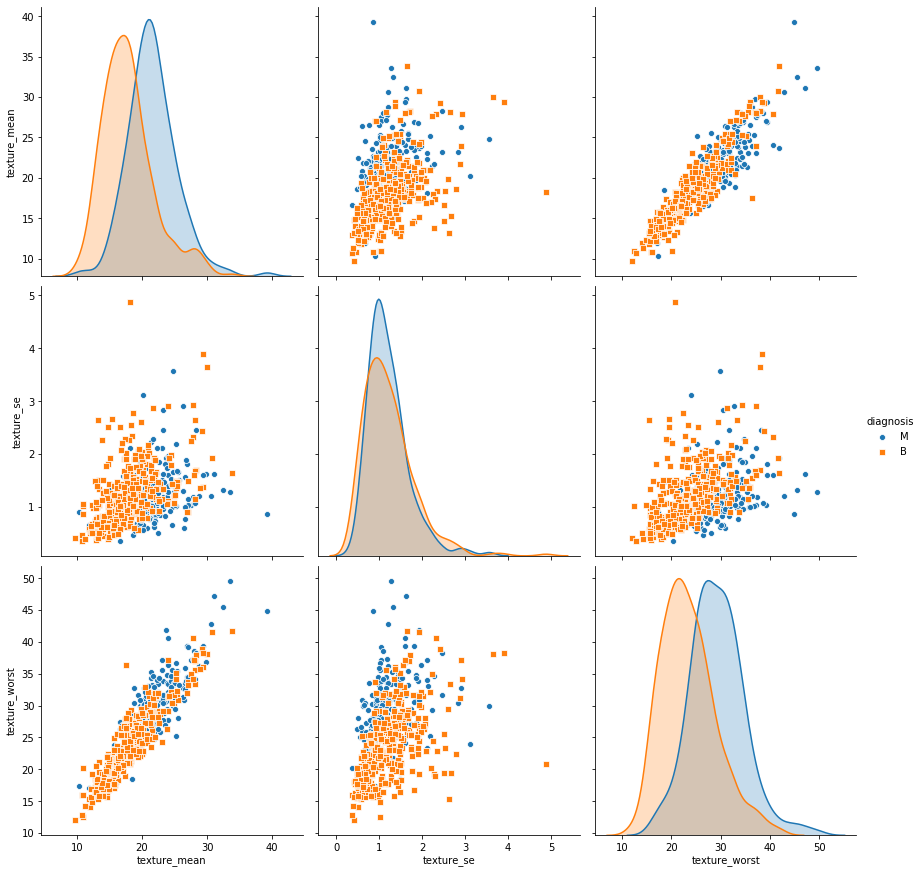

In [16]:
texture = df[groups[1]]
fig = plt.figure()
fig = sns.pairplot(texture, hue='diagnosis', markers=["o", "s"],height=4)
fig.savefig('texture_pairplot.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

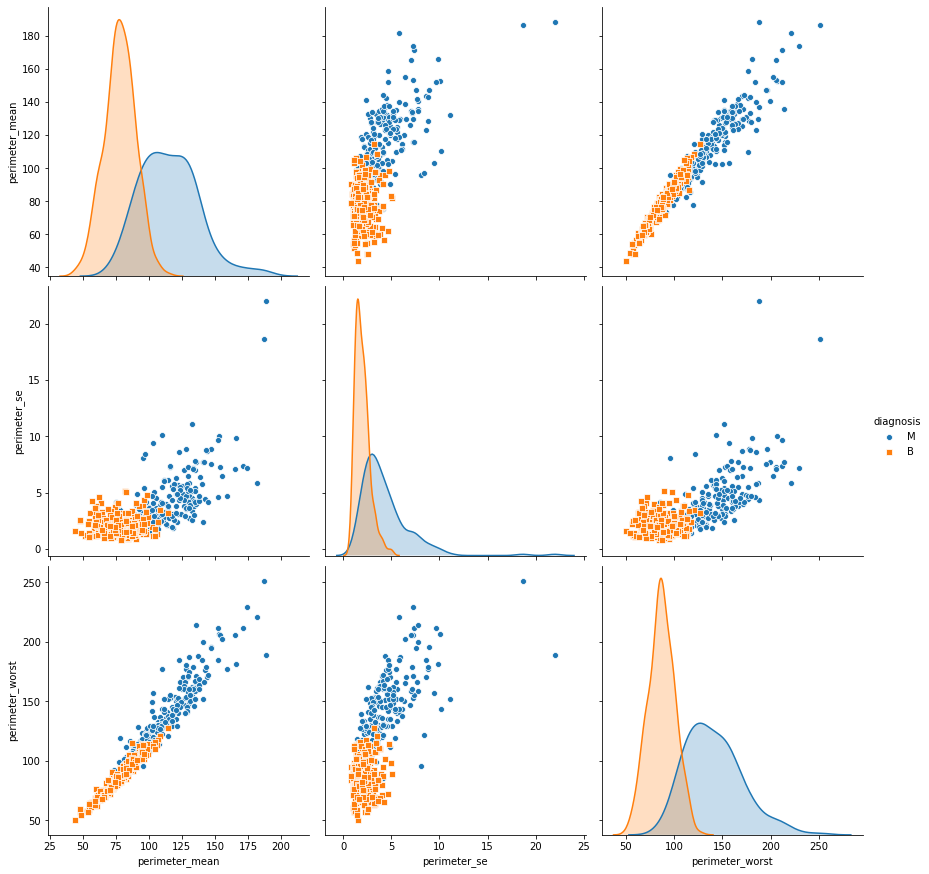

In [17]:
perimeter = df[groups[2]]
fig = plt.figure()
fig = sns.pairplot(perimeter, hue='diagnosis', markers=["o", "s"],height=4)
fig.savefig('perimeter_pairplot.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

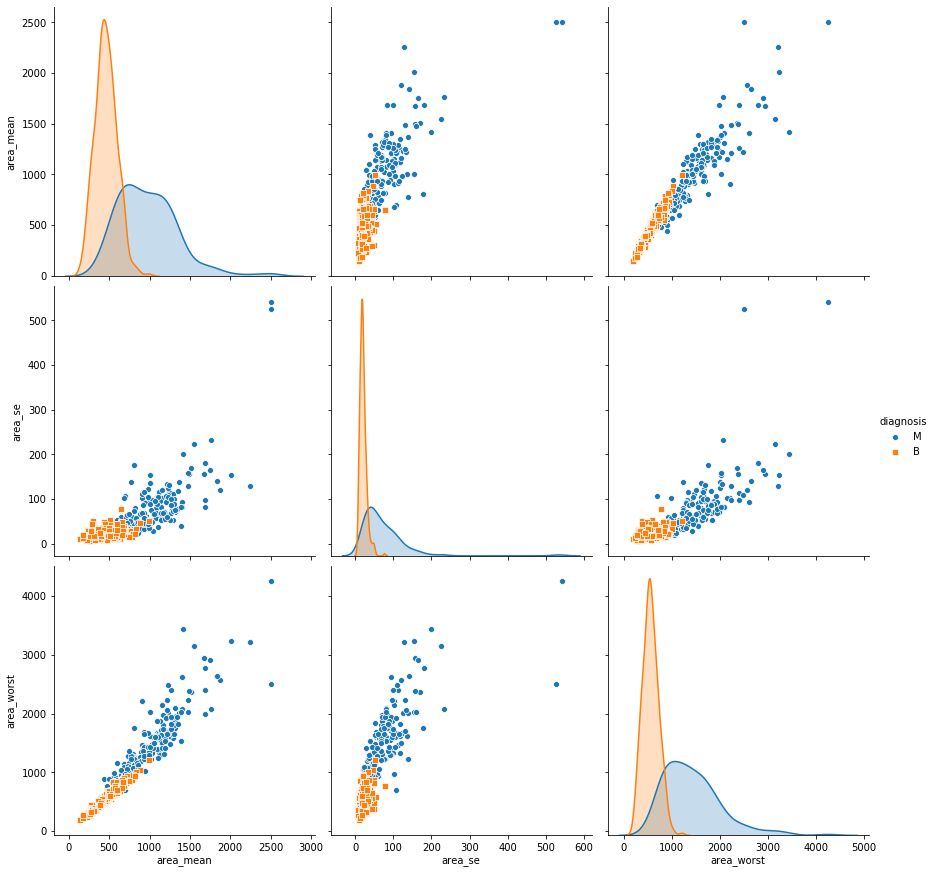

In [18]:
area = df[groups[3]]
fig = plt.figure()
fig = sns.pairplot(area, hue='diagnosis', markers=["o", "s"],height=4)
fig.savefig('area_pairplot.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

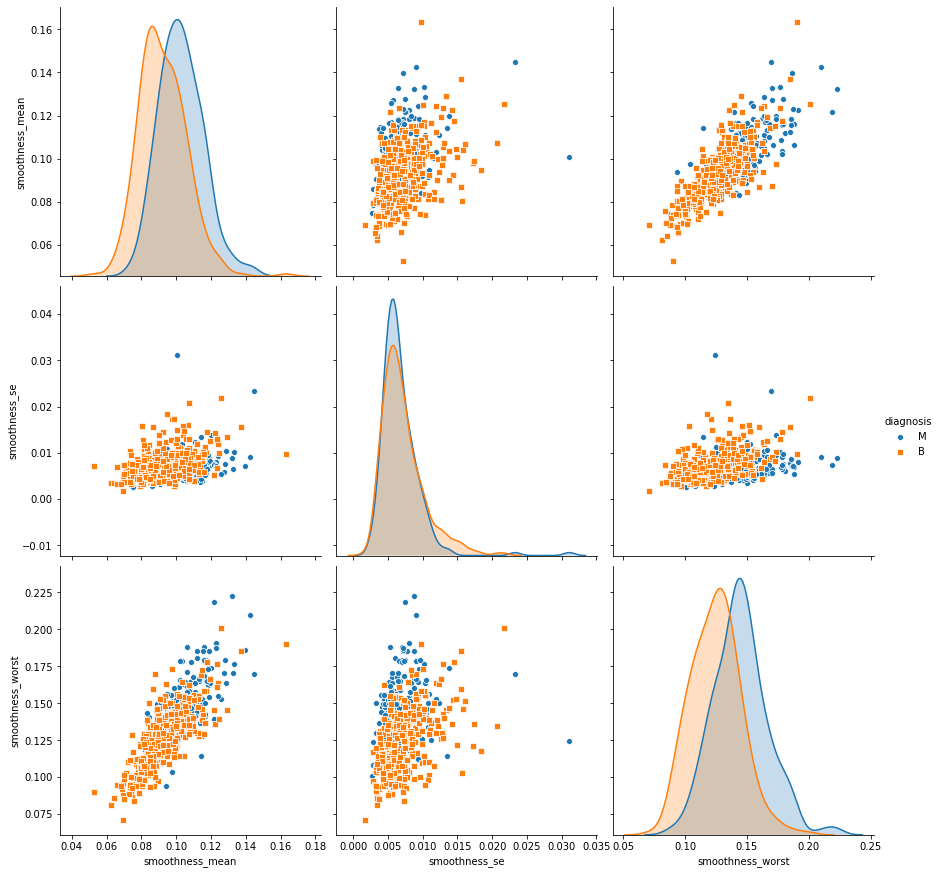

In [19]:
smoothness = df[groups[4]]
fig = plt.figure()
fig = sns.pairplot(smoothness, hue='diagnosis', markers=["o", "s"],height=4)
fig.savefig('smoothness_pairplot.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

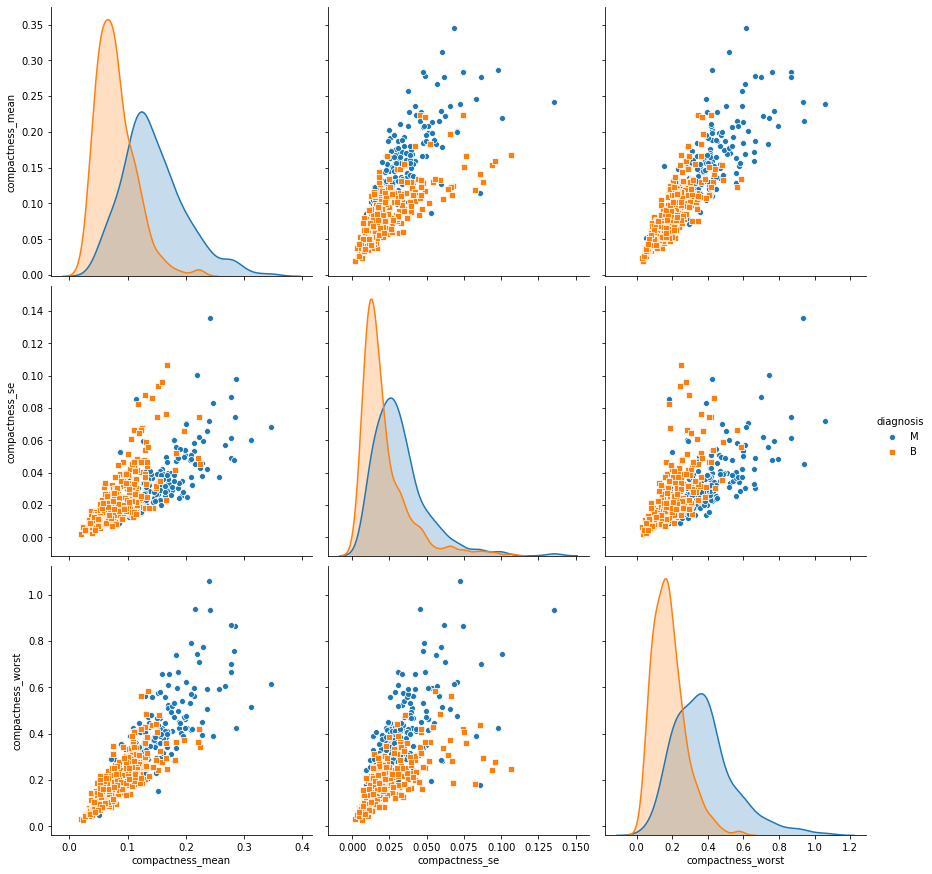

In [20]:
compactness = df[groups[5]]
fig = plt.figure()
fig = sns.pairplot(compactness, hue='diagnosis', markers=["o", "s"],height=4)
fig.savefig('compactness_pairplot.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

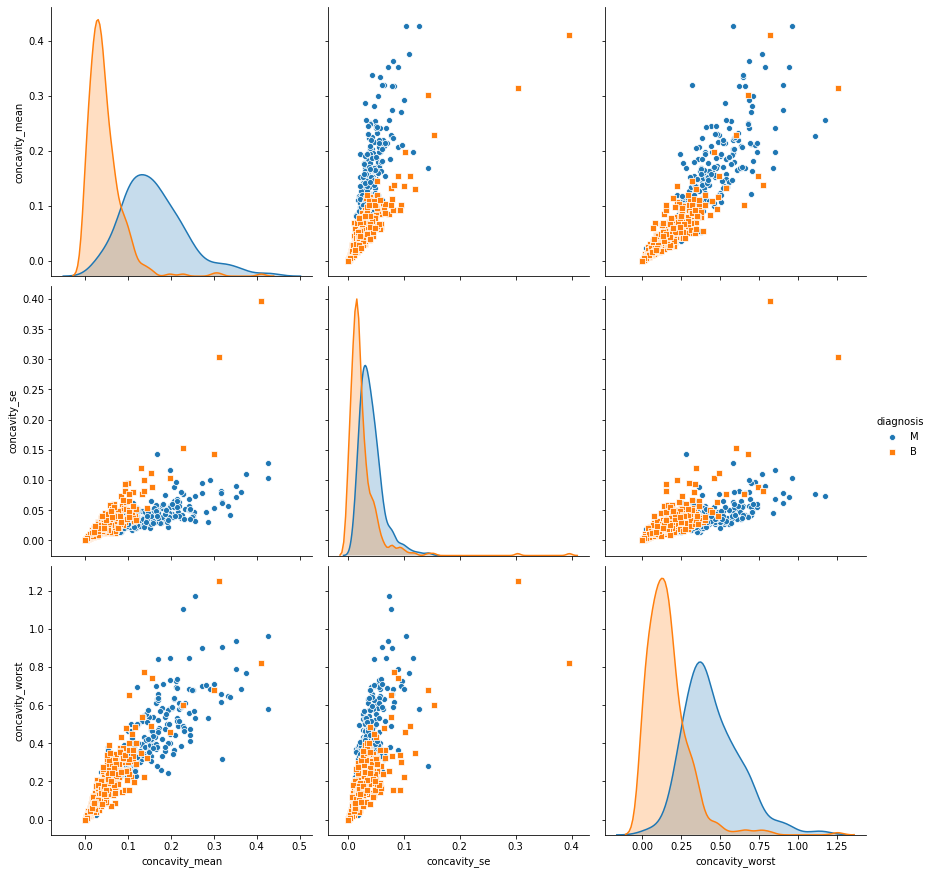

In [21]:
concavity = df[groups[6]]
fig = plt.figure()
fig = sns.pairplot(concavity, hue='diagnosis', markers=["o", "s"],height=4)
fig.savefig('concavity_pairplot.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

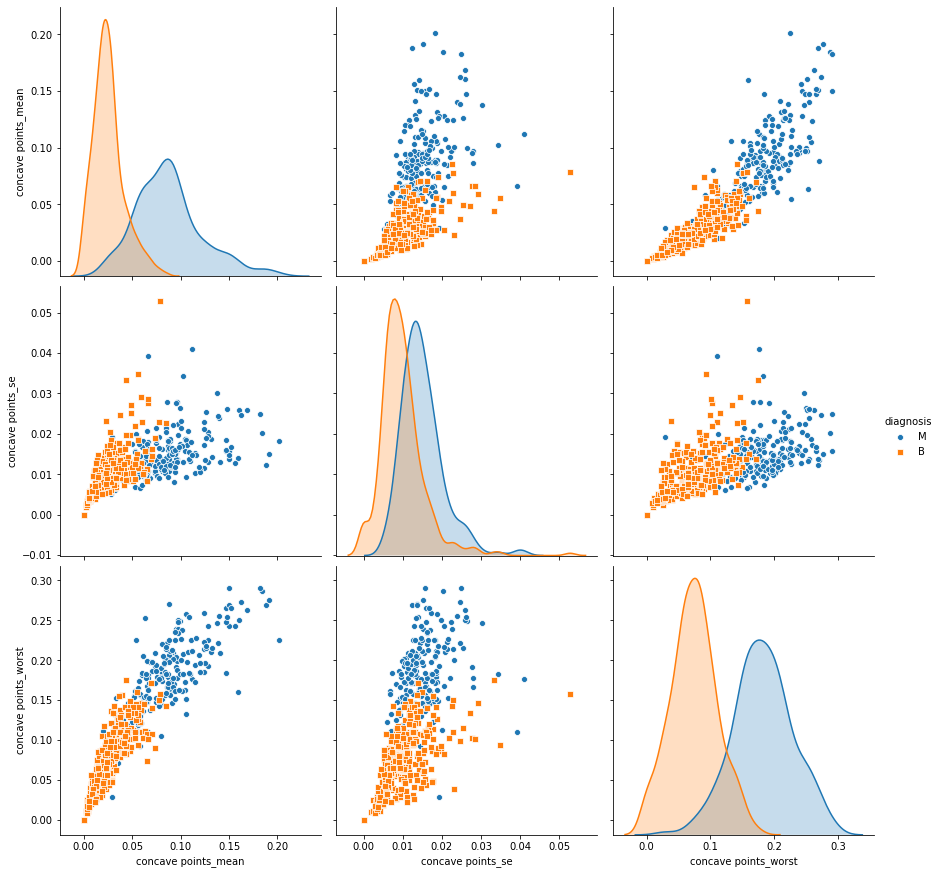

In [22]:
concave_points = df[groups[7]]
fig = plt.figure()
fig = sns.pairplot(concave_points, hue='diagnosis', markers=["o", "s"],height=4)
fig.savefig('concave_points_pairplot.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

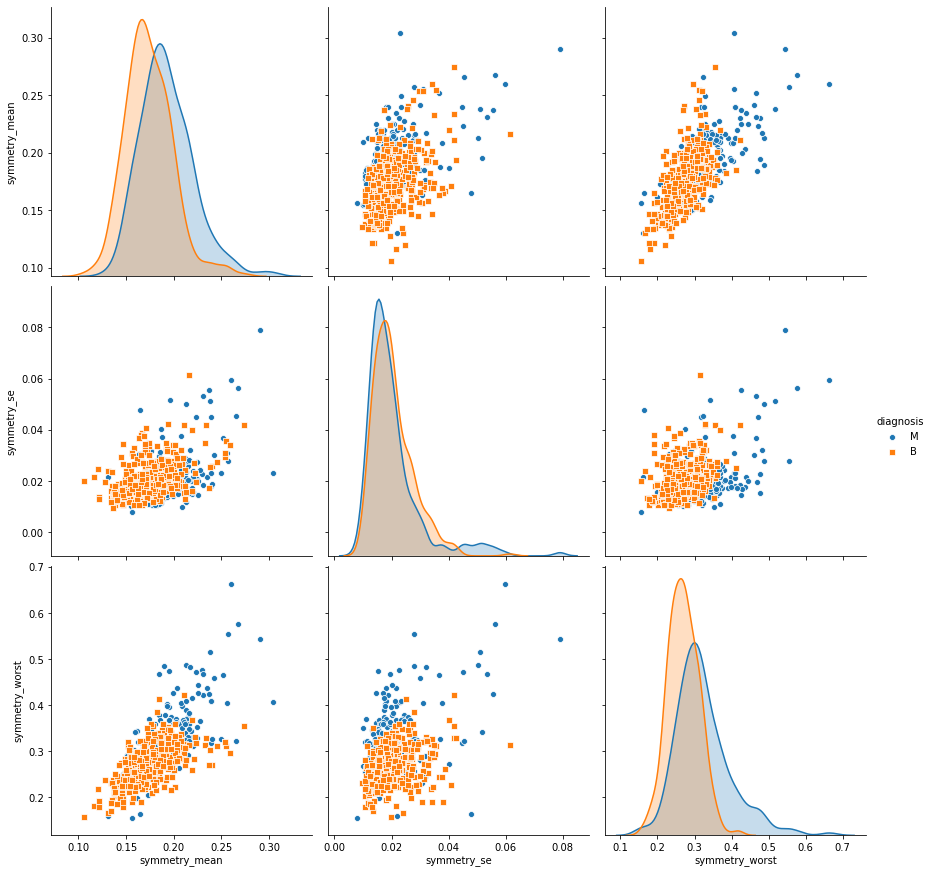

In [23]:
symmetry = df[groups[8]]
fig = plt.figure()
fig = sns.pairplot(symmetry, hue='diagnosis', markers=["o", "s"],height=4)
fig.savefig('symmetry_pairplot.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

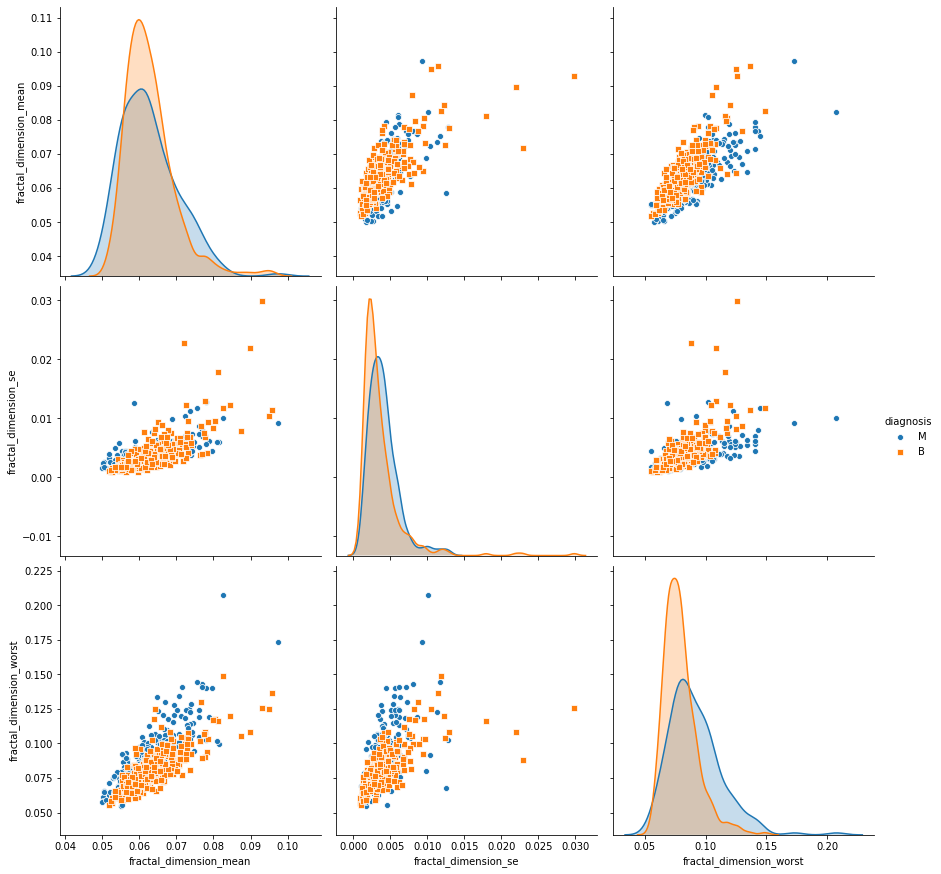

In [24]:
fractal_dimension = df[groups[9]]
fig = plt.figure()
fig = sns.pairplot(fractal_dimension, hue='diagnosis', markers=["o", "s"],height=4)
fig.savefig('fractal_dimension_pairplot.png', bbox_inches = 'tight')

In [25]:
df['diagnosis'].replace({'B' : 0, 'M' : 1}, inplace = True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


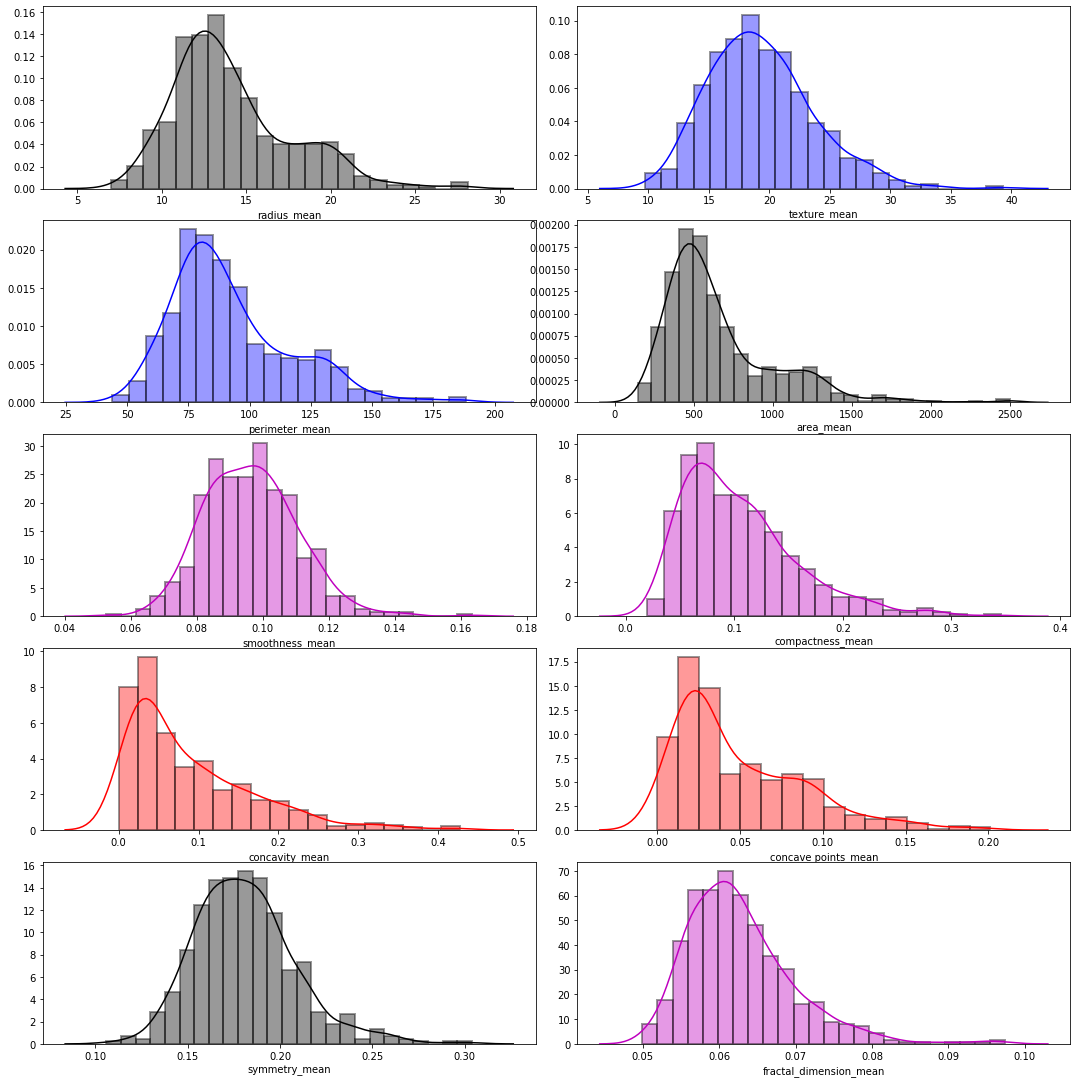

In [26]:
colors = ['b', 'g', 'r', 'm', 'k']
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (15, 15))
plt.tight_layout()
data1 = np.reshape(column[2:12], (5, 2))

for i in range(5):
    for j in range(2):
        sns.distplot(df[data1[i][j]], ax = axes[i][j], hist_kws=dict(edgecolor= 'k', linewidth=2), color = np.random.choice(colors))
        
fig.savefig('distplot1.png', bbox_inches = 'tight')

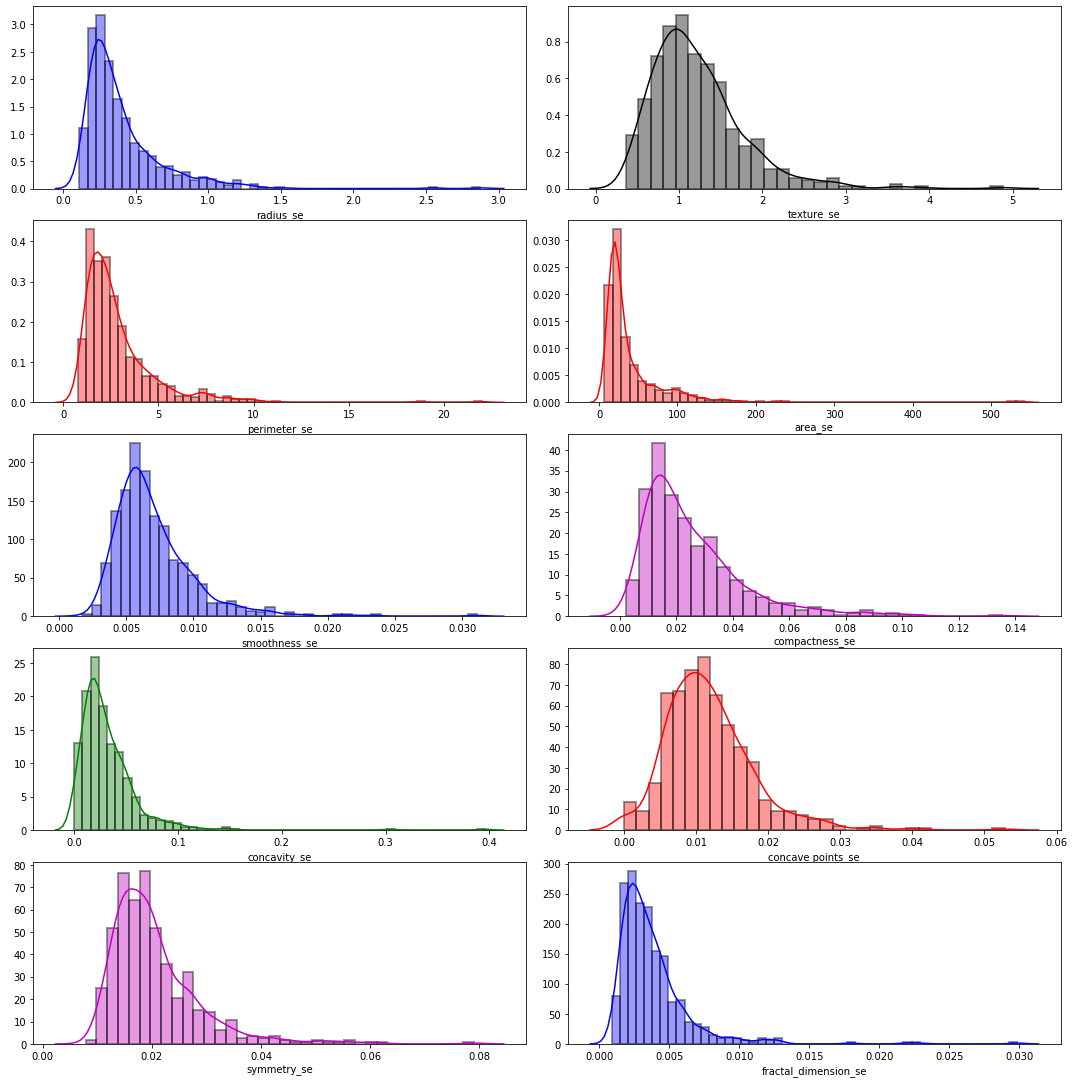

In [27]:
colors = ['b', 'g', 'r', 'm', 'k']
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (15, 15))
plt.tight_layout()
data2 = np.reshape(column[12:22], (5, 2))

for i in range(5):
    for j in range(2):
        sns.distplot(df[data2[i][j]], ax = axes[i][j], hist_kws=dict(edgecolor= 'k', linewidth=2), color = np.random.choice(colors))
        
fig.savefig('distplot2.png', bbox_inches = 'tight')

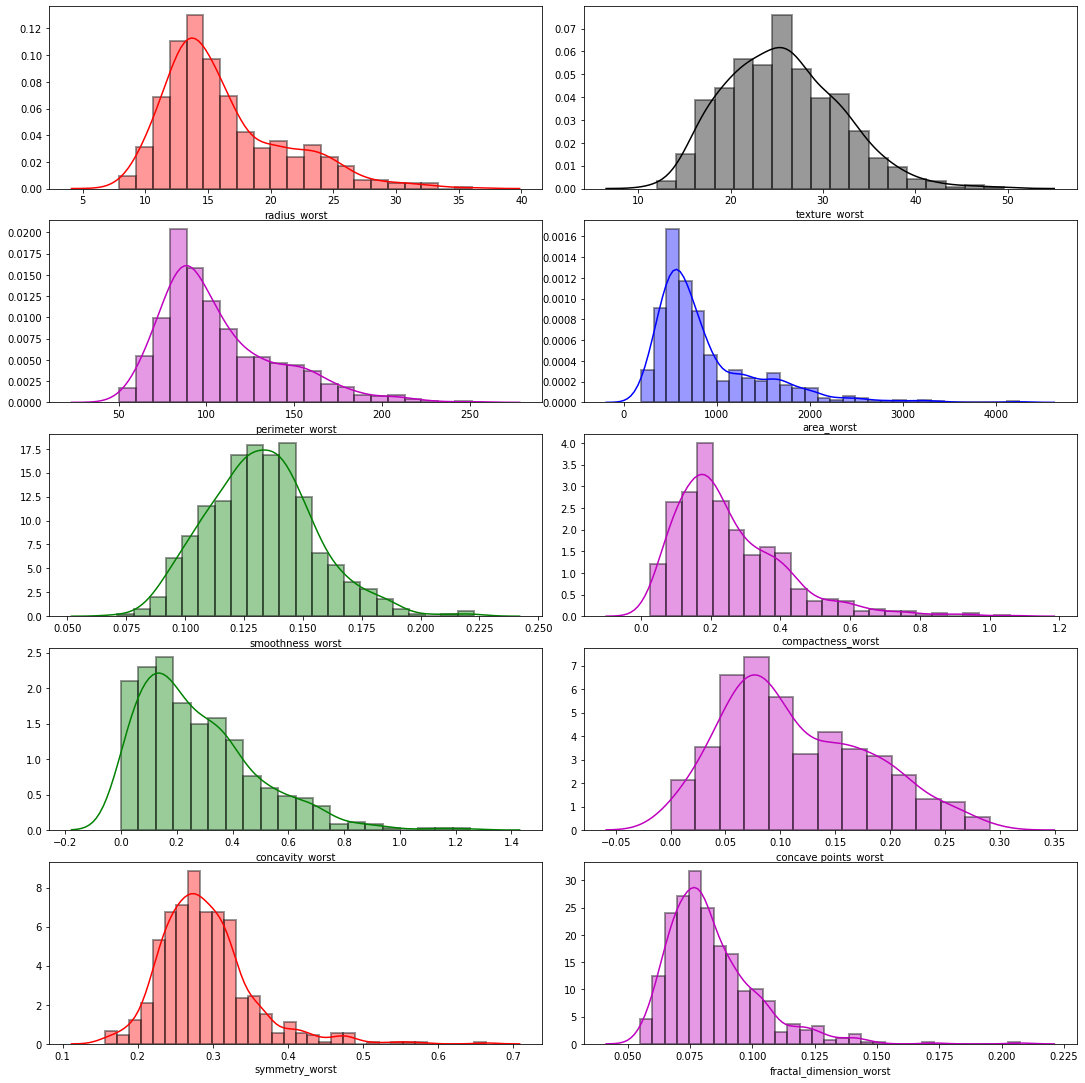

In [28]:
colors = ['b', 'g', 'r', 'm', 'k']
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (15, 15))
plt.tight_layout()
data3 = np.reshape(column[22:32], (5, 2))

for i in range(5):
    for j in range(2):
        sns.distplot(df[data3[i][j]], ax = axes[i][j], hist_kws=dict(edgecolor= 'k', linewidth=2), color = np.random.choice(colors))
        
fig.savefig('distplot3.png', bbox_inches = 'tight')

In [29]:
df1 = df.drop(columns = ['id'])

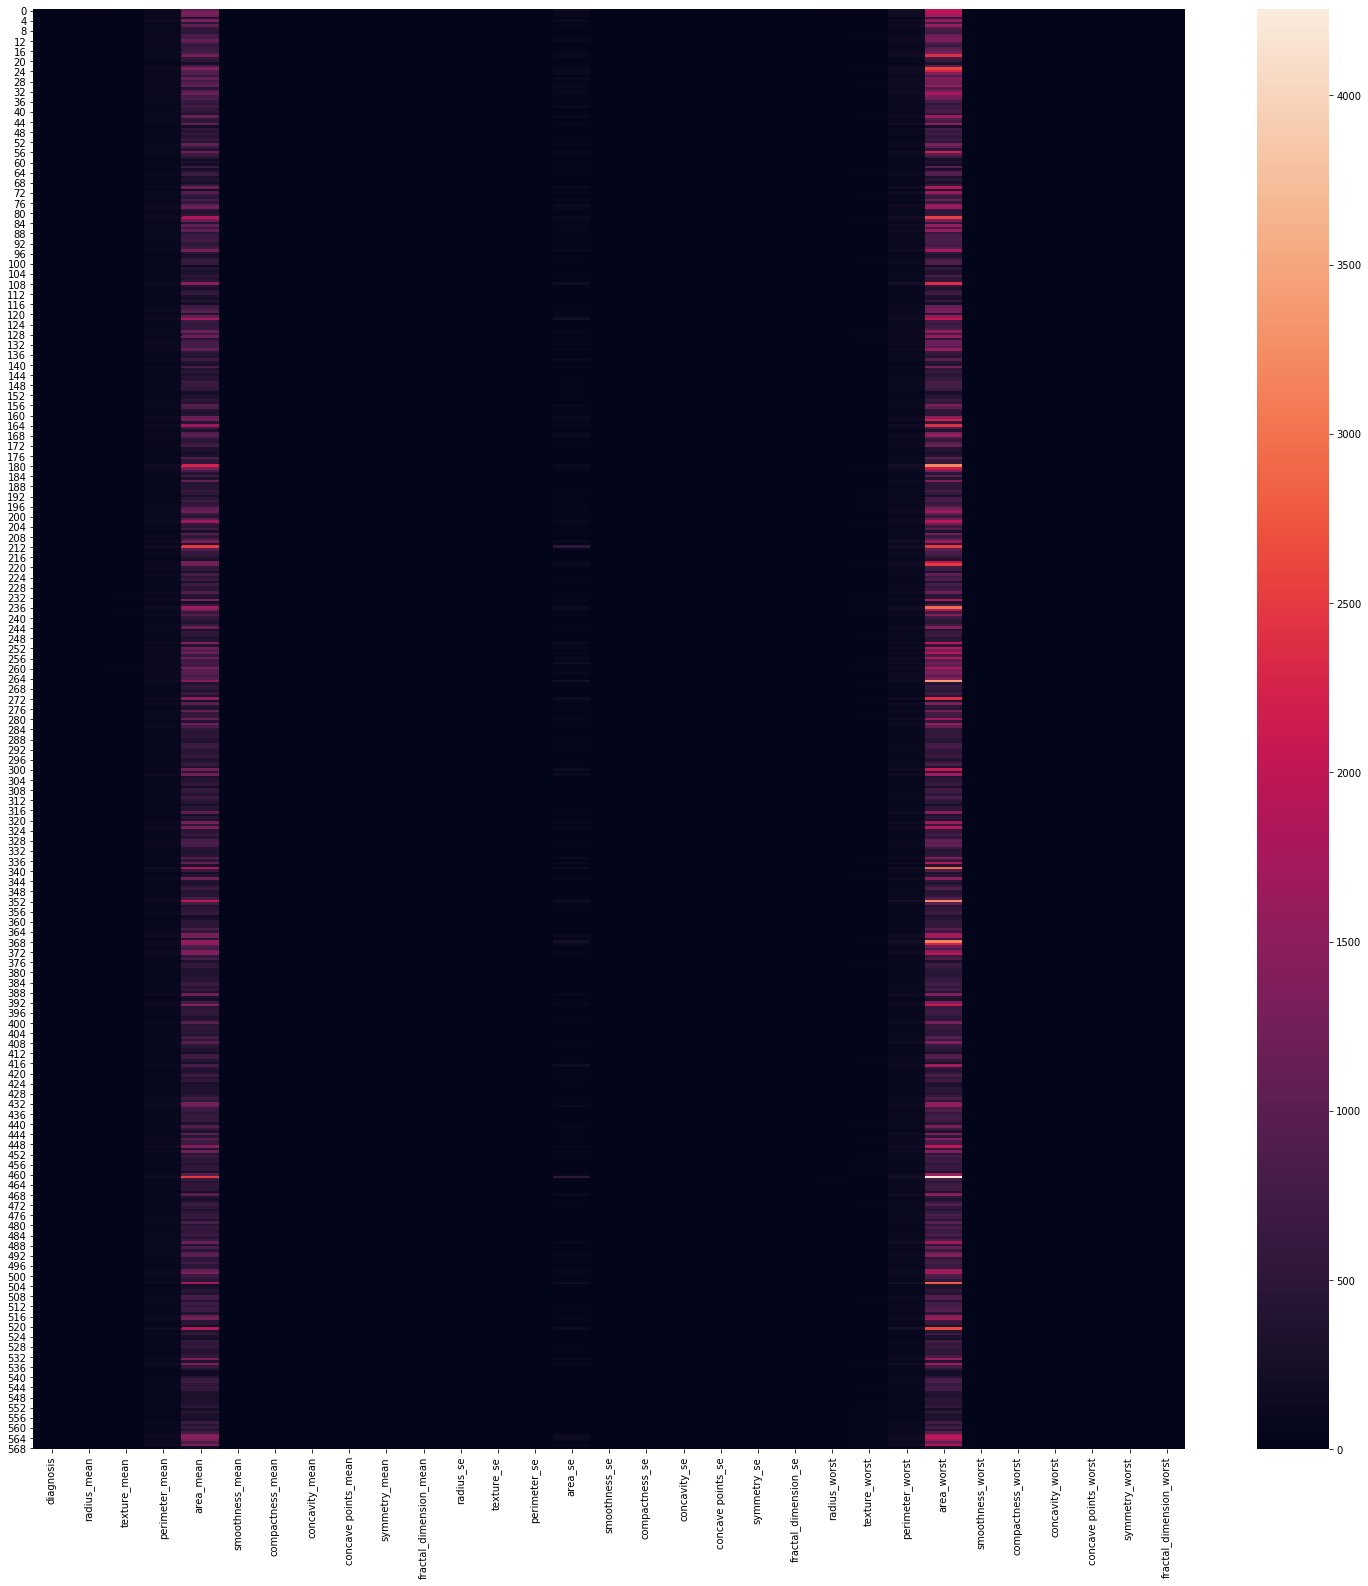

In [30]:
fig = plt.figure(figsize = (20, 20))
ax = fig.add_axes([0, 0, 1, 1])
sns.heatmap(df1, ax = ax)
fig.savefig('heatmap.png', bbox_inches = 'tight')

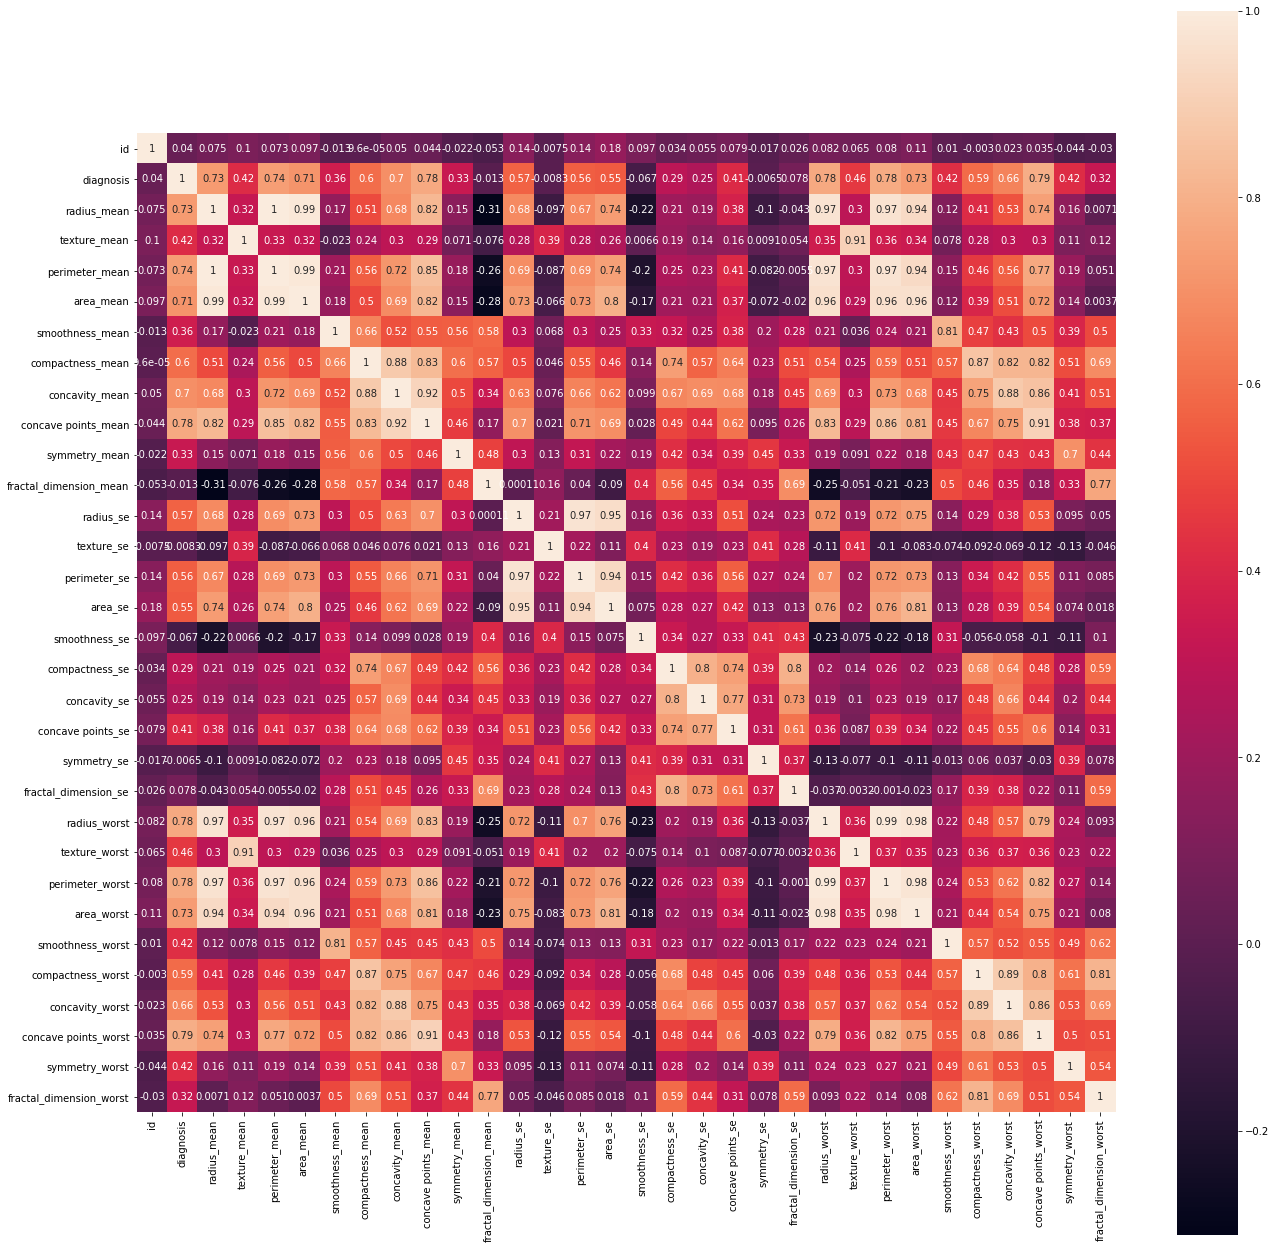

In [31]:
correlation = df.corr()
# correlation matrix of the dataset
fig = plt.figure(figsize = (17, 17))
ax = fig.add_axes([0, 0, 1, 1])
sns.heatmap(correlation, ax = ax, square = True, annot = True, linecolor = 'w')
fig.savefig('correlation_heatmap.png', bbox_inches = 'tight')

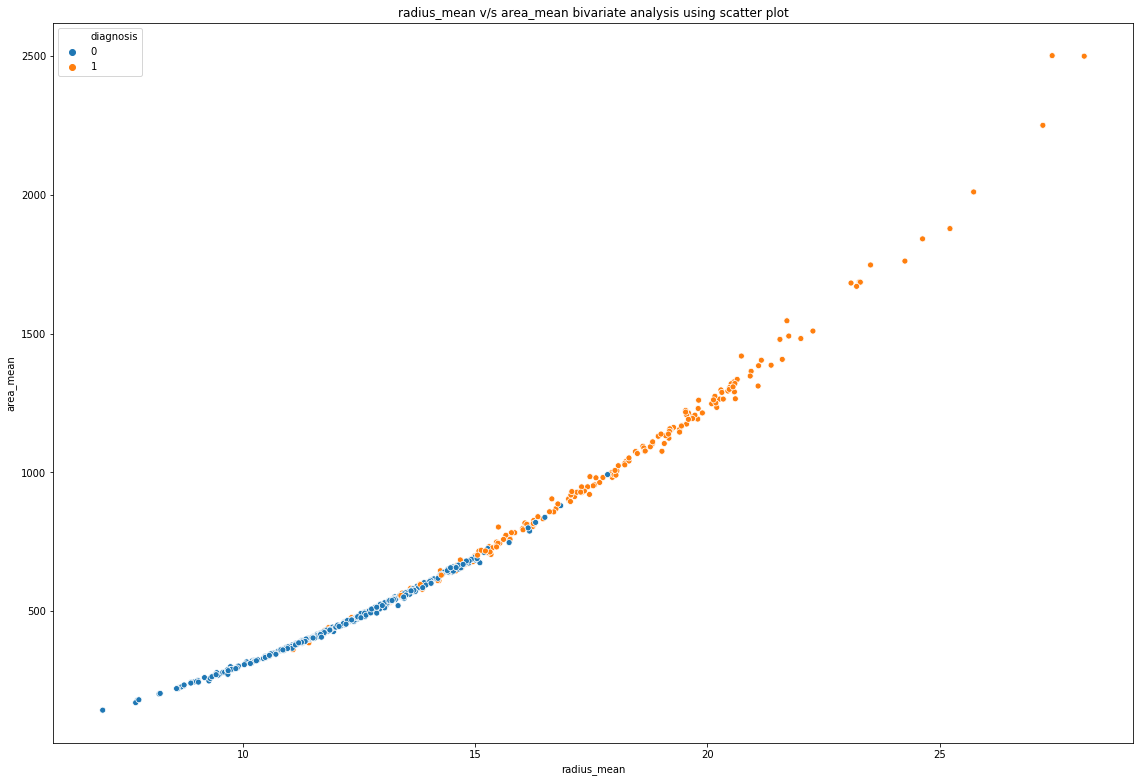

In [32]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_axes([0, 0, 1, 1])
sns.scatterplot(x = 'radius_mean', y = 'area_mean', data = df1, hue = 'diagnosis', ax = ax)
ax.set_title('radius_mean v/s area_mean bivariate analysis using scatter plot')
fig.savefig('scatterplot.png', bbox_inches = 'tight')

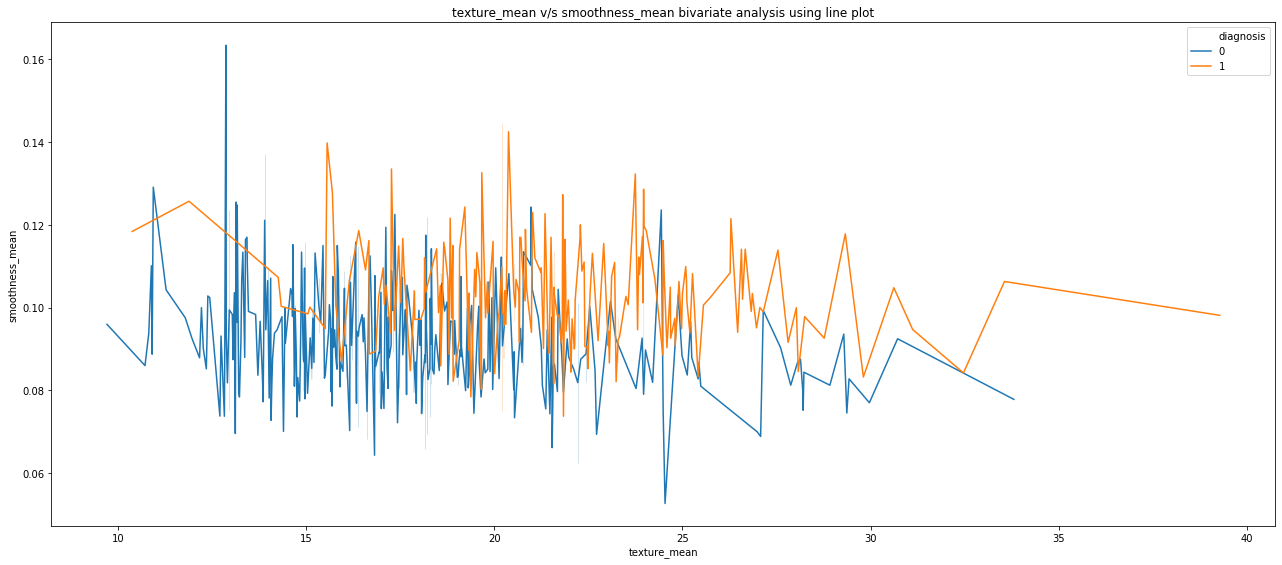

In [33]:
fig = plt.figure(figsize = (17, 7))
ax = fig.add_axes([0, 0, 1, 1])
sns.lineplot(x = 'texture_mean', y = 'smoothness_mean', data = df1, hue = 'diagnosis', ax = ax)
ax.set_title('texture_mean v/s smoothness_mean bivariate analysis using line plot')
fig.savefig('lineplot.png', bbox_inches = 'tight')

<Figure size 1080x720 with 0 Axes>

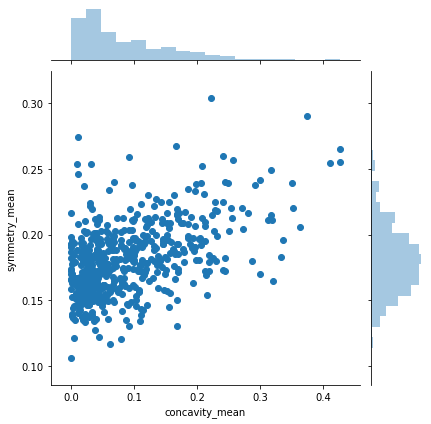

In [34]:
fig = plt.figure(figsize = (15, 10))
fig = sns.jointplot(x = 'concavity_mean', y = 'symmetry_mean', data = df1)
fig.savefig('jointplot.png', bbox_inches = 'tight')

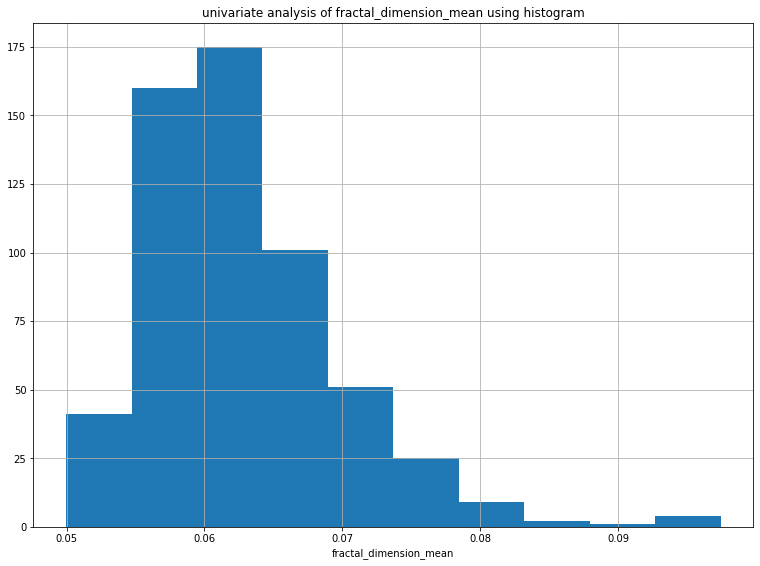

In [35]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_axes([0, 0, 1, 1])
df['fractal_dimension_mean'].hist(ax = ax)
ax.set_xlabel('fractal_dimension_mean')
ax.set_title('univariate analysis of fractal_dimension_mean using histogram')
fig.savefig('histplot.png', bbox_inches = 'tight')

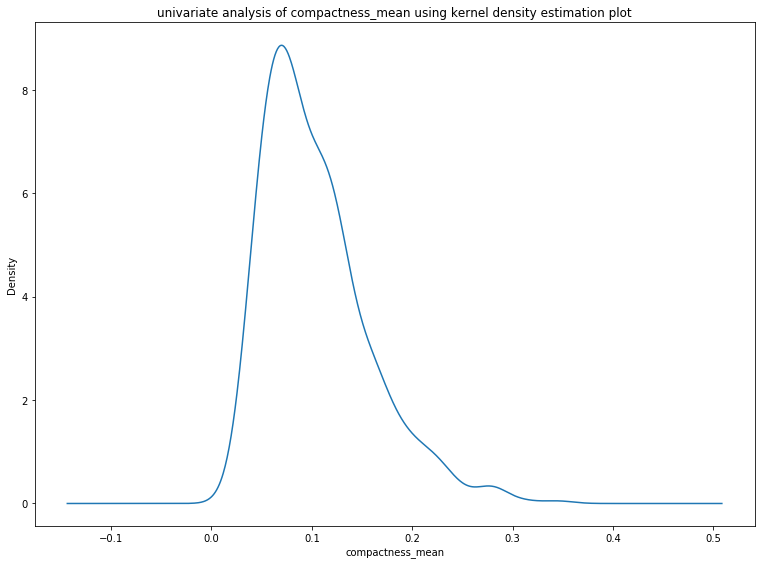

In [36]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_axes([0, 0, 1, 1])
df['compactness_mean'].plot.kde(ax = ax)
ax.set_xlabel('compactness_mean')
ax.set_title('univariate analysis of compactness_mean using kernel density estimation plot')
fig.savefig('kdeplot.png', bbox_inches = 'tight')

In [37]:
from mpl_toolkits.mplot3d import Axes3D 

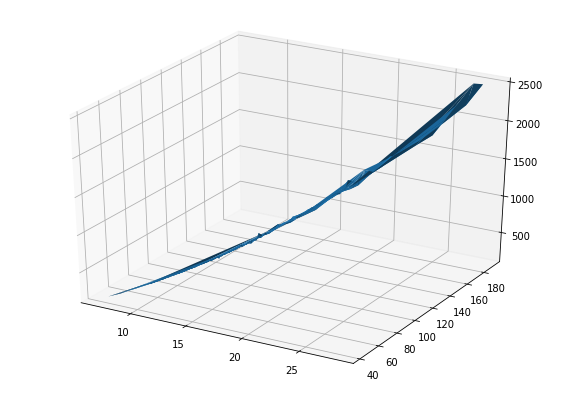

In [38]:
fig = plt.figure(figsize = (10, 7)) 
axes = fig.gca(projection ='3d') 
axes.plot_trisurf(df1['radius_mean'], df1['perimeter_mean'], df1['area_mean']) 
fig.savefig('surfaceplot.png', bbox_inches = 'tight')

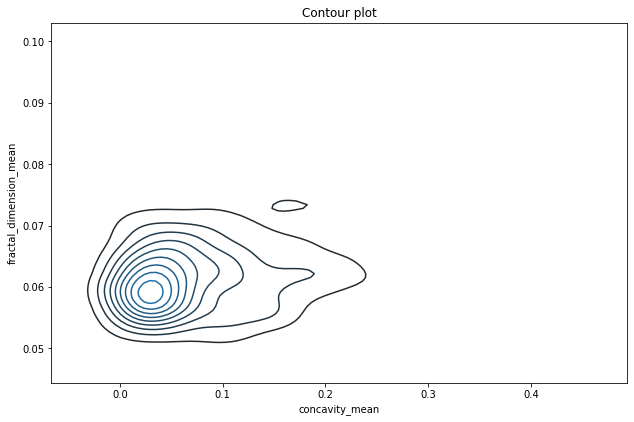

In [39]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])
sns.kdeplot(df['concavity_mean'], df['fractal_dimension_mean'], ax = ax)
ax.set_title('Contour plot')
fig.savefig('contourplot.png', bbox_inches = 'tight')

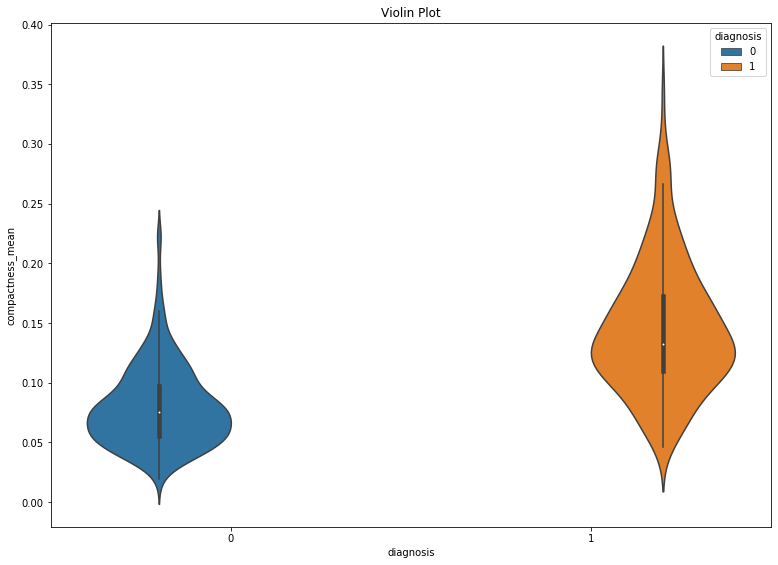

In [40]:
fig = plt.figure(figsize = (10, 7))
axes = fig.add_axes([0, 0, 1, 1])
sns.violinplot(x='diagnosis', y='compactness_mean', data=df, hue='diagnosis', ax = axes)
axes.set_title('Violin Plot')
fig.savefig('violinplot.png', bbox_inches = 'tight')

<Figure size 720x720 with 0 Axes>

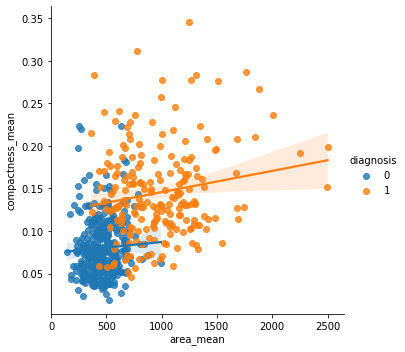

In [41]:
fig = plt.figure(figsize = (10, 10))
fig = sns.lmplot(x='area_mean', y='compactness_mean', data=df, hue='diagnosis')
fig.savefig('lmplot.png', bbox_inches = 'tight')

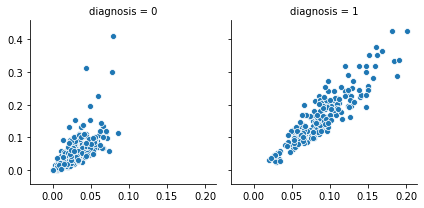

In [42]:
g = sns.FacetGrid(df1, col = 'diagnosis')
g.map_dataframe(sns.scatterplot, x = 'concave points_mean', y = 'concavity_mean')
g.savefig('FacetGridplot.png')